# Load the model

In [1]:
from transformers import BartForConditionalGeneration, BartTokenizer, GenerationConfig

# saved model
model = BartForConditionalGeneration.from_pretrained("../models/bart-swipe/model")
# tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
# generation config
generation_config = GenerationConfig.from_pretrained("../models/bart-swipe/model")
model.generation_config = generation_config

# Load the data

In [31]:
import pandas as pd

# fine-tuned model: generation results 
df_results = pd.read_csv("../data/predictions_bart-large-swipe-adamw-paged8bit.csv")
df_results_sari = pd.read_csv("../data/bart-large-swipe_sari-adam-paged8bit.csv")
df_results_sari_easse = pd.read_csv("../data/bart-large-swipe_sari_easse-adam-paged8bit.csv")
df_results_op = pd.read_csv("../data/op_scores_bart-large-swipe-adamw-paged8bit.csv")

# original model: bart-large 
df = pd.read_csv("../data/predictions_bart-large.csv")
df_sari = pd.read_csv("../data/bart-large_sari.csv")
df_sari_easse = pd.read_csv("../data/bart-large_sari_easse.csv")
df_op = pd.read_csv("../data/op_scores_bart-large.csv")

In [18]:
df_results_sari_easse.head()

,text,reference,prediction,sari_score
0,The term jargon may have the following meaning...,Jargon is a special way to use words that are ...,The term jargon may have the following meaning...,3.395062
1,"Russian (Russkij yazyk, Русский язык) is the m...",Russian (русский язык (russkij yazyk)) is the ...,"Russian (Russkij yazyk, Русский язык) is the m...",22.981391
2,"Great Britain, also called Britain, is an isla...",Great Britain is the main part of the United K...,"Great Britain, also called Britain, is an isla...",31.676173
3,"Transport, or transportation (as it is called ...",Transport is the movement of people and things...,"Transport, or transportation (as it is called ...",34.712289
4,Stockholm (help·info) (IPA: ['stɔkhɔlm]; UN/LO...,Stockholm is the capital of Sweden. It is loca...,Stockholm (help·info) (IPA: ['stɔkhɔlm]; UN/LO...,12.850817


# SARI scores

In [10]:
import matplotlib.pyplot as plt

def plot_dist(df_col, df_results_col, score_type):

    plt.figure(figsize=(10, 6))
    # original model
    plt.hist(df_col, bins=20, alpha=0.5, color='skyblue', edgecolor='black', label='Original BART')
    # fine-tuned model
    plt.hist(df_results_col, bins=20, alpha=0.5, color='orange', edgecolor='black', label='Fine-tuned BART')
    plt.title(f'{score_type} Scores', fontsize=16, fontweight='bold')
    plt.xlabel(f'{score_type} Score', fontsize=14)
    plt.ylabel('Number of Texts', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.show()

## Hugging Face metric

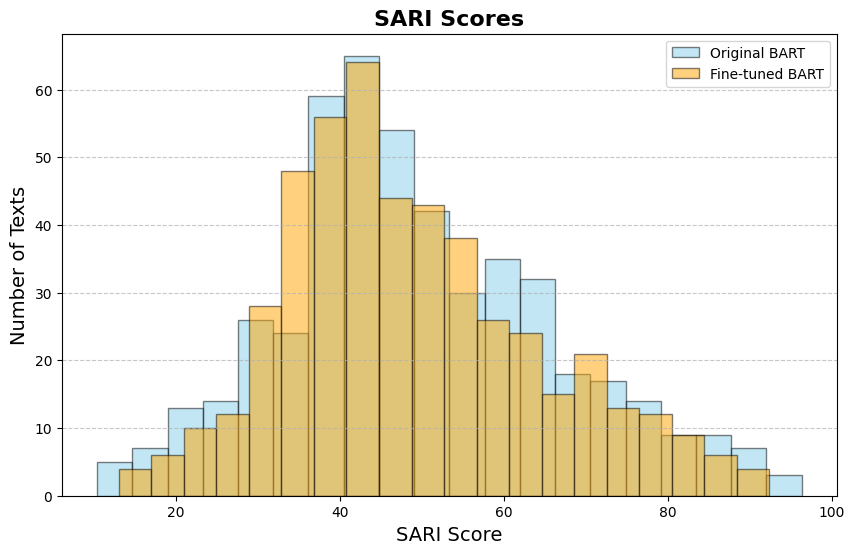

In [15]:
plot_dist(df_sari['sari_score'], df_results_sari['sari_score'], score_type="SARI")

In [16]:
print("Mean SARI score:")
print(f"Original BART: {df_sari['sari_score'].mean()}")
print(f"Fine-tuned BART: {df_results_sari['sari_score'].mean()}")

Mean SARI score:
Original BART: 49.48096249295494
Fine-tuned BART: 48.83351591353965


## EASSE package

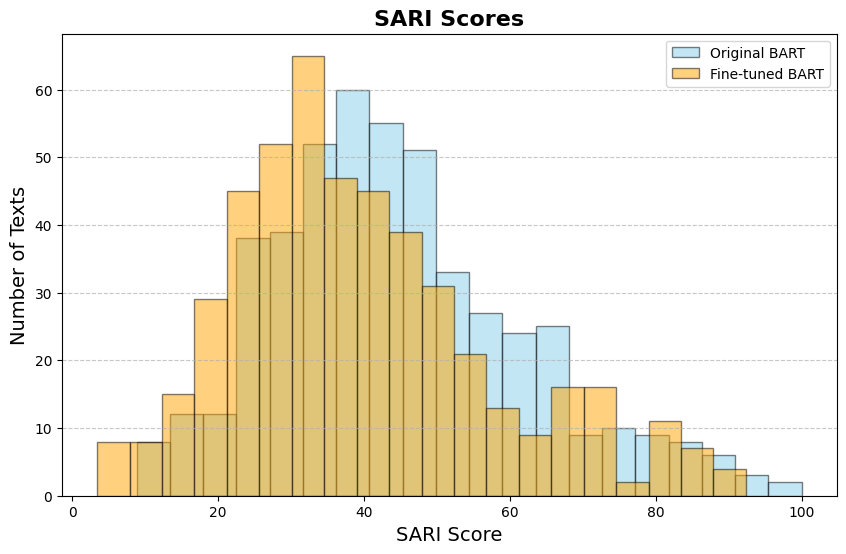

In [19]:
plot_dist(df_sari_easse['sari_score_easse'], df_results_sari_easse['sari_score'], score_type="SARI")

In [20]:
print("Mean SARI score:")
print(f"Original BART: {df_sari_easse['sari_score_easse'].mean()}")
print(f"Fine-tuned BART: {df_results_sari_easse['sari_score'].mean()}")

Mean SARI score:
Original BART: 44.74640578745792
Fine-tuned BART: 39.64759954078891


## Calculate operation scores

In [29]:
from easse.sari import get_corpus_sari_operation_scores
from tqdm.notebook import tqdm

add_scores = []
keep_scores = []
del_scores = []

for index, row in tqdm(df_results_sari_easse.iterrows(), total=len(df_results)):
    r_content = row['text'] 
    s_content = row['reference']  
    prediction = row['prediction']  
    
    add_score, keep_score, del_score = get_corpus_sari_operation_scores(
        orig_sents=[r_content],
        sys_sents=[prediction],
        refs_sents=[[s_content]] 
    )
    
    add_scores.append(add_score)
    keep_scores.append(keep_score)
    del_scores.append(del_score)

  0%|          | 0/483 [00:00<?, ?it/s]

## Operation scores

In [35]:
# Original model
print("Original BART:")
print(f"Addition score: {df_op['add_score'].mean()}")
print(f"Keep score: {df_op['keep_score'].mean()}")
print(f"Deletion score: {df_op['del_score'].mean()}", end='\n\n')

# Fine-tuned model
print("Fine-tuned BART:")
print(f"Addition score: {df_results_op['add_score'].mean()}")
print(f"Keep score: {df_results_op['keep_score'].mean()}")
print(f"Deletion score: {df_results_op['del_score'].mean()}", end='\n\n')

Original BART:
Addition score: 14.409176171522335
Keep score: 59.1495754866222
Deletion score: 60.68046570422921

Fine-tuned BART:
Addition score: 12.554497986054288
Keep score: 58.38228234035026
Deletion score: 48.006018295962164



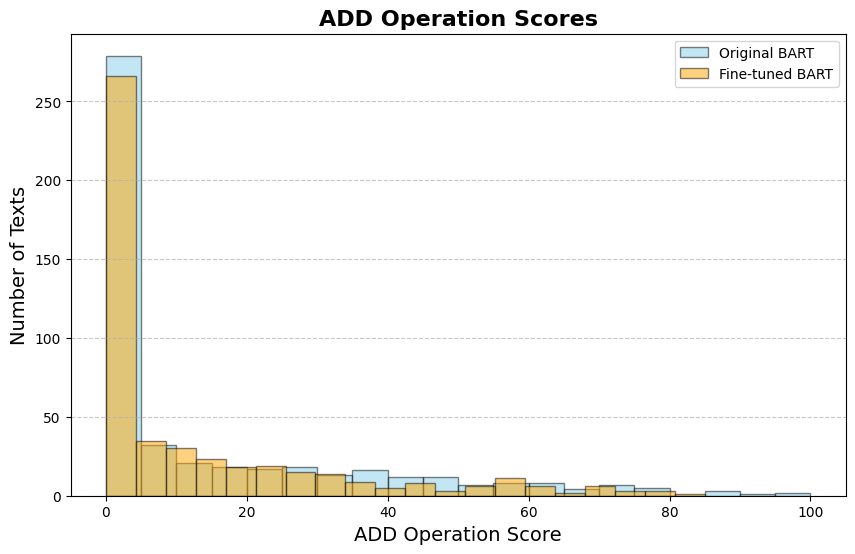

In [32]:
plot_dist(df_op['add_score'], df_results_op['add_score'], score_type="ADD Operation")

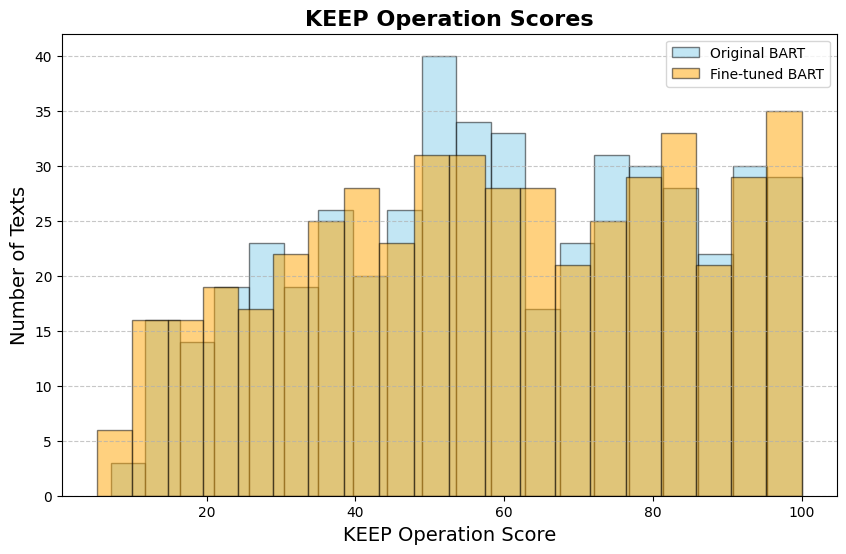

In [33]:
plot_dist(df_op['keep_score'], df_results_op['keep_score'], score_type="KEEP Operation")

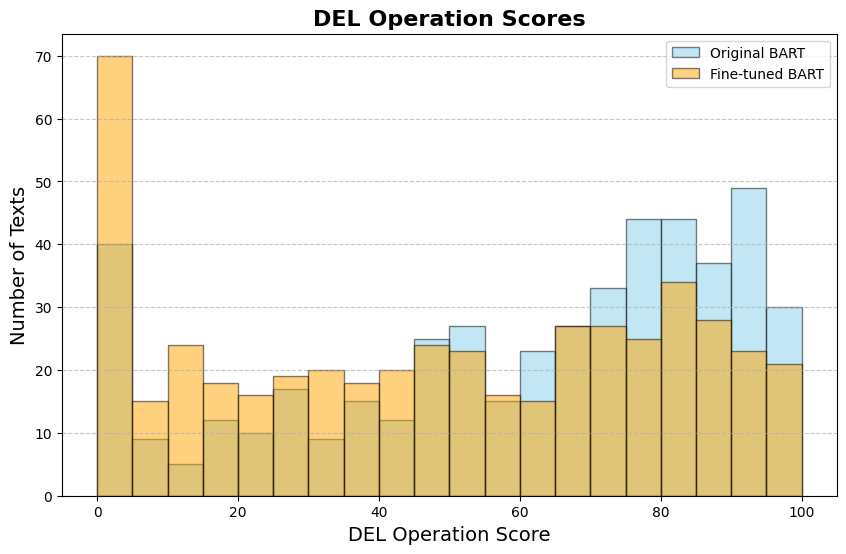

In [34]:
plot_dist(df_op['del_score'], df_results_op['del_score'], score_type="DEL Operation")

# Evaluation on ASSET-test dataset

In [7]:
import pandas as pd

df_sari_orig = pd.read_csv("../data/sari_scores/sari_scores_bart-large-swipe_asset-test.csv")
df_sari_ft = pd.read_csv("../data/sari_scores/sari_scores_bart-large-swipe-adamw-paged8bit_asset-test.csv")

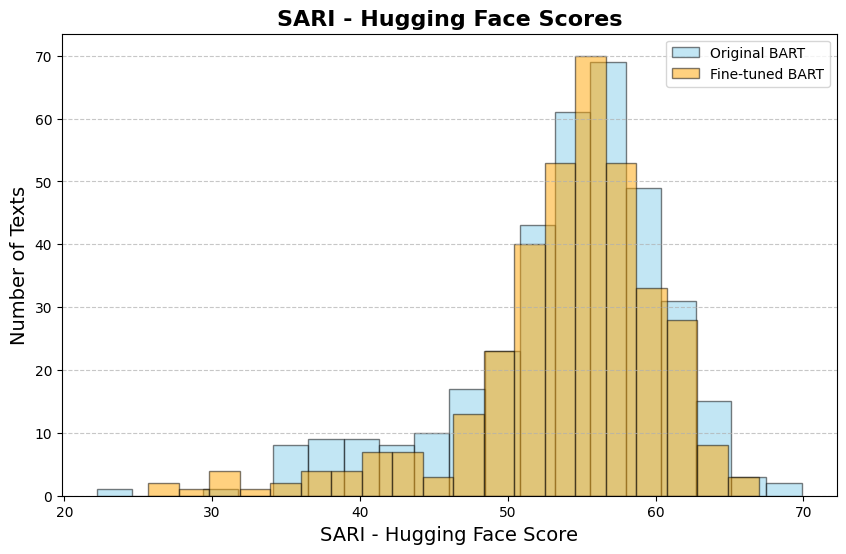

In [11]:
plot_dist(df_sari_orig['sari_score'], df_sari_ft['sari_score'], score_type="SARI - Hugging Face")

In [12]:
print("Mean SARI score:")
print(f"Original BART: {df_sari_orig['sari_score'].mean()}")
print(f"Fine-tuned BART: {df_sari_ft['sari_score'].mean()}")

Mean SARI score:
Original BART: 53.8607874892777
Fine-tuned BART: 53.872776935305694


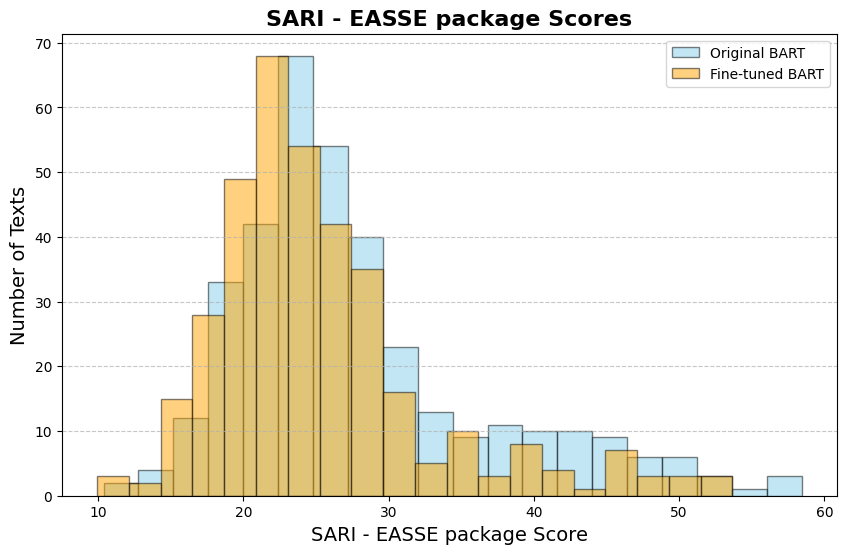

In [13]:
plot_dist(df_sari_orig['sari_score_easse'], df_sari_ft['sari_score_easse'], score_type="SARI - EASSE package")

In [14]:
print("Mean SARI score:")
print(f"Original BART: {df_sari_orig['sari_score_easse'].mean()}")
print(f"Fine-tuned BART: {df_sari_ft['sari_score_easse'].mean()}")

Mean SARI score:
Original BART: 27.91453390965993
Fine-tuned BART: 25.23825501488427


## Operation Scores

In [15]:
df_op_orig = pd.read_csv("../data/operation_scores/op_scores_bart-large-swipe_asset-test.csv")
df_op_ft = pd.read_csv("../data/operation_scores/op_scores_bart-large-swipe-adamw-paged8bit_asset-test.csv")

In [17]:
# Original model
print("Original BART:")
print(f"Addition score: {df_op_orig['add_score'].mean()}")
print(f"Keep score: {df_op_orig['keep_score'].mean()}")
print(f"Deletion score: {df_op_orig['del_score'].mean()}", end='\n\n')

# Fine-tuned model
print("Fine-tuned BART:")
print(f"Addition score: {df_op_ft['add_score'].mean()}")
print(f"Keep score: {df_op_ft['keep_score'].mean()}")
print(f"Deletion score: {df_op_ft['del_score'].mean()}", end='\n\n')

Original BART:
Addition score: 9.894620008453318
Keep score: 61.61367108368523
Deletion score: 12.235310636841234

Fine-tuned BART:
Addition score: 6.843697535746313
Keep score: 61.58353682546211
Deletion score: 7.287530683444383



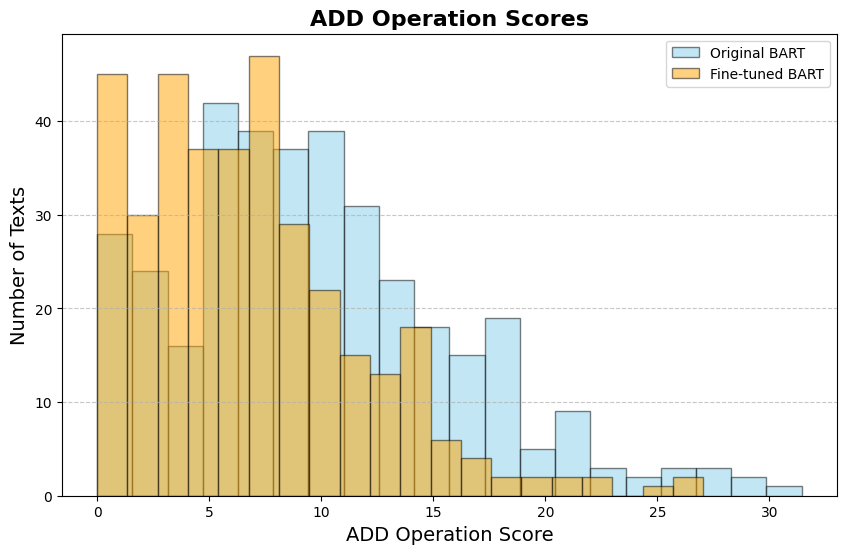

In [16]:
plot_dist(df_op_orig['add_score'], df_op_ft['add_score'], score_type="ADD Operation")

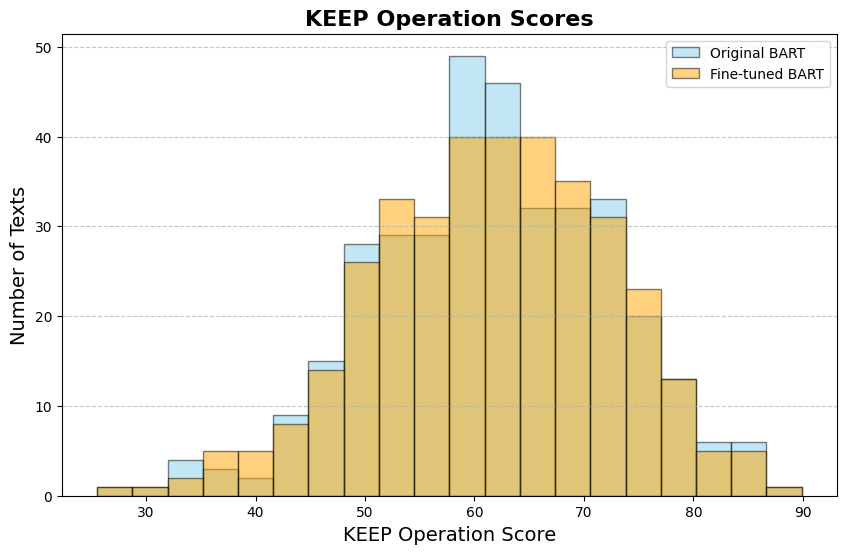

In [18]:
plot_dist(df_op_orig['keep_score'], df_op_ft['keep_score'], score_type="KEEP Operation")

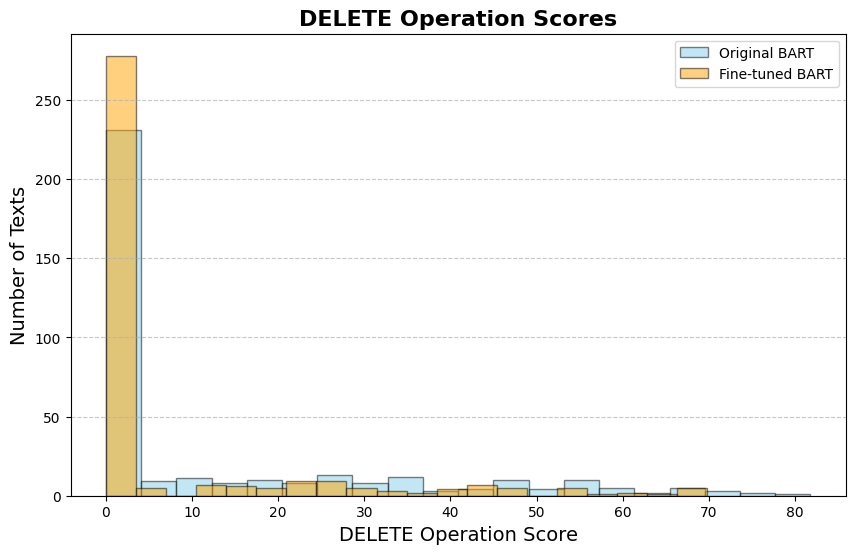

In [19]:
plot_dist(df_op_orig['del_score'], df_op_ft['del_score'], score_type="DELETE Operation")